Create task graph and partial task graph

In [2]:
import torch
from env import CholeskyTaskGraph
import networkx as nx
from torch_geometric.utils.convert import to_networkx

import pydot
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np

In [2]:
env = CholeskyTaskGraph(6, 4, 2)

In [3]:
env.reset()

KeyError: tensor([[[0]]])

In [2]:
n = 10

def succASAP(task, n):
    tasktype = task.type
    i = task.barcode[1]
    j = task.barcode[2]
    k = task.barcode[3]
    listsucc = []
    if tasktype == 0:
        if i < n:
            for j in range(i + 1, n + 1, 1):
                y = (2, i, j, 0)
                listsucc.append(Task(y))
        else:
            y = (4, 0, 0, 0)
            listsucc.append(Task(y))

    if tasktype == 1:
        if j < i - 1:
            y = (1, i, j + 1, 0)
            listsucc.append(Task(y))
        else:
            y = (0, i, 0, 0)
            listsucc.append(Task(y))

    if tasktype == 2:
        if i <= n - 1:
            for k in range(i + 1, j):
                y = (3, k, j, i)
                listsucc.append(Task(y))
            for k in range(j + 1, n + 1):
                y = (3, j, k, i)
                listsucc.append(Task(y))
            y = (1, j, i, 0)
            listsucc.append(Task(y))

    if tasktype == 3:
        if k < i - 1:
            y = (3, i, j, k + 1)
            listsucc.append(Task(y))
        else:
            y = (2, i, j, 0)
            listsucc.append(Task(y))

    return listsucc

def add_task(dic_already_seen, list_to_process, task):
    if task.barcode in dic_already_seen:
        pass
    else:
        dic_already_seen[task.barcode] = len(dic_already_seen)
        list_to_process.append(task)
        

ReadyTasks=[]
TaskList = {}
EdgeList = []

ReadyTasks.append(Task((0,1,0,0)))
TaskList[(0,1,0,0)] = 0


window = 3

i = 0
while len(ReadyTasks)>0 and i < window :
    for i in range(len(ReadyTasks)):
        task = ReadyTasks.pop(0)
        list_succ = succASAP(task, n)
        for t_succ in list_succ:
            add_task(TaskList, ReadyTasks, t_succ)
            EdgeList.append((TaskList[task.barcode], TaskList[t_succ.barcode]))
    i += 1

In [3]:
# len(EdgeList)
len(TaskList)

55

In [4]:
colors = {0: [0, 0, 0], 1: [230, 190, 255], 2: [170, 255, 195], 3: [255, 250, 200],
                       4: [255, 216, 177], 5: [250, 190, 190], 6: [240, 50, 230], 7: [145, 30, 180], 8: [67, 99, 216],
                       9: [66, 212, 244], 10: [60, 180, 75], 11: [191, 239, 69], 12: [255, 255, 25], 13: [245, 130, 49],
                       14: [230, 25, 75], 15: [128, 0, 0], 16: [154, 99, 36], 17: [128, 128, 0], 18: [70, 153, 144],
                       19: [0, 0, 117]}
color_normalized = {i: list(np.array(colors[i])/255) for i in colors}


def render(graph, tasklist):
    # pos = nx.spring_layout(graph)
    pos = graphviz_layout(graph, prog='dot', root=[1, 20])
    # pos = graphviz_layout(G, prog='tree')
    node_color = [color_normalized[task[0]] for task in tasklist]
    plt.figure(figsize=(8, 8))
    nx.draw_networkx_nodes(graph, pos, node_color=node_color)
    nx.draw_networkx_edges(graph, pos)

/home/nathan/anaconda3/envs/GRAN/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/nathan/anaconda3/envs/GRAN/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


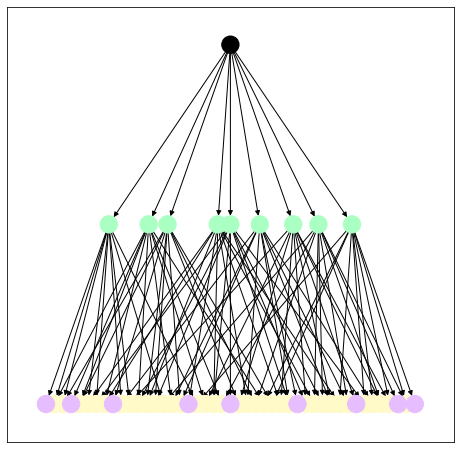

In [5]:
# G = nx.DiGraph()
# G.add_nodes_from(list(TaskList.values()))
# G.add_edges_from(EdgeList)
data = Data(x=torch.tensor(list(TaskList.values()), dtype=torch.float), edge_index=torch.tensor(EdgeList).t().contiguous())
G = to_networkx(data)

render(G, TaskList)

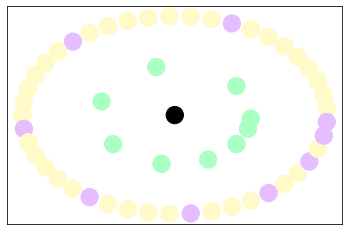

In [6]:
# pos = nx.spring_layout(G)
pos = graphviz_layout(G, prog='twopi')
node_color = [color_normalized[task[0]] for task in TaskList]

nx.draw_networkx_nodes(G, pos, node_color=node_color)

In [7]:
len(succASAP(Task((0,1,0,0)), 20))

19

In [76]:
list(G.successors(0))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [112]:
L = [1,2,3,4]
l = L.copy()
l.append(7)
print(L)

[1, 2, 3, 4]


In [121]:
data.edge_index[0] is in [3]

SyntaxError: invalid syntax (<ipython-input-121-c831d1abbb24>, line 1)

In [123]:
L = np.array([1,2,3])
L in [2]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [130]:
np.isin(L, [1,2])

array([ True,  True, False])

In [132]:
def isin(ar1, ar2):
    return (ar1[..., None] == ar2).any(-1)

isin(data.edge_index[0], torch.tensor([0]))

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False])

In [1]:
from utils import *

/home/nathan/anaconda3/envs/GRAN/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


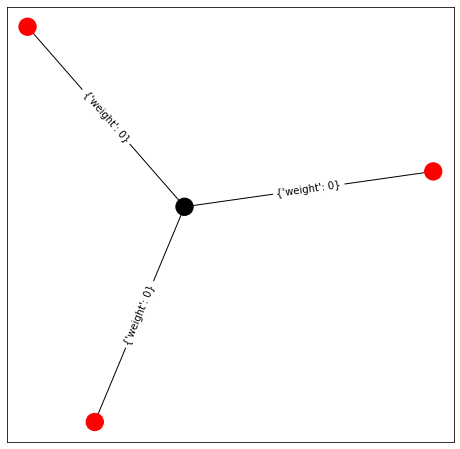

In [2]:

cluster = Cluster([0, 1, 1, 1], [(0, 1, 0), (0, 2, 0), 
                                 (0, 3, 0)])
cluster.render()

In [9]:
data2 = compute_sub_graph(data, torch.tensor([0]), 3)

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False])
tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([ True, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False])
tensor([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
        28, 29, 

In [13]:
a = torch.tensor([1,2,3,1,2])
torch.unique(a)

tensor([1, 2, 3])

In [8]:
edge_list = torch.tensor([[], []])
a = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
b = torch.tensor([0, 0, 0, 0, 0, 0, 0, 0, 0])

edge_list = torch.cat((edge_list, torch.tensor([b, a])), dim=1)

ValueError: only one element tensors can be converted to Python scalars

In [15]:
d = {1:2, 2:3, 3:4}
for i in d.items():
    print(i)

(1, 2)
(2, 3)
(3, 4)


In [10]:
G2 = to_networkx(data2)

/home/nathan/anaconda3/envs/GRAN/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/nathan/anaconda3/envs/GRAN/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


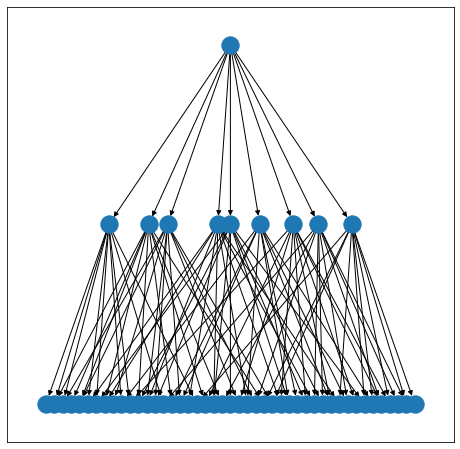

In [13]:
pos = graphviz_layout(G2, prog='dot', root=[1, 20])
# pos = graphviz_layout(G, prog='tree')
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G2, pos)
nx.draw_networkx_edges(G2, pos)


In [12]:
n = []
n_nodes = []
n_edges = []
for i in range(300):
    data, _ = compute_graph(i)
    n.append(i)
    n_nodes.append(data.num_nodes)
    n_edges.append(data.num_edges)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [13]:
len(n_nodes)

300

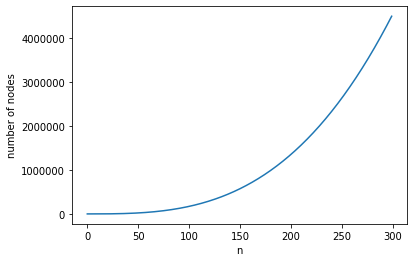

In [14]:
fig, ax = plt.subplots()
plt.plot(n, n_nodes)
ax.set_xlabel('n')
ax.set_ylabel('number of nodes')
plt.show()


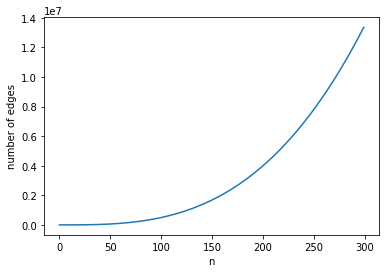

In [15]:
fig, ax = plt.subplots()
plt.plot(n, n_edges)
ax.set_xlabel('n')
ax.set_ylabel('number of edges')
plt.show()

In [7]:
data, task_array = compute_graph(2)


In [8]:
task_array


array([[0, 1, 0, 0],
       [2, 1, 2, 0],
       [1, 2, 1, 0],
       [0, 2, 0, 0],
       [4, 0, 0, 0]])

In [ ]:
import numpy as np
a = np.array([1,2])
a 

In [ ]:
import numpy as np
a = np.array([1,2])
a.copy()

In [ ]:
import numpy as np
a = np.array([1,2])
a.copy()

In [ ]:
a = [1, 2]
a.append(1,2)
a

In [5]:
a = [1, 2]
a.append(1,2)
a

array([1, 2])

In [1]:
from utils import *
import numpy as np
import torch

x = np.array(range(10))
edges = [np.zeros(9), np.array(range(1, 10))]
task_array = np.zeros(10)
G = TaskGraph(x=torch.tensor(x, dtype=torch.float),
              edge_index=torch.tensor(edges).t().contiguous(), task_list=task_array)
# G = Data(x=torch.tensor(x, dtype=torch.float),
#                 edge_index=torch.tensor(edges).t().contiguous())

In [2]:
G = compute_graph(8)

In [ ]:
path = "/home/nathan/PycharmProjects/HPC/SLC.txt"
taskGraph2SLC(G, path)

In [ ]:
a = torch.tensor([1,2,3])
b = torch.tensor[1, 1, 2, ]

In [3]:
a = torch.tensor([1,2,3])
b = torch.tensor[1, 1, 2, ]

In [ ]:
a = torch.tensor([1,2,3])
b = torch.tensor[1, 1, 2, ]

In [5]:
a = np.array([[1, 2], 3 ])


array([list([1, 2]), 3], dtype=object)

# Transfert

In [3]:
# model = torch.load('/home/nathan/PycharmProjects/HPC/runs/Apr13_13-24-04_chifflet-6.lille.grid5000.fr/model.pth')
model = torch.load('/home/nathan/PycharmProjects/HPC/runs/Apr13_14-24-24_nathan-Latitude-7490/model.pth')

/home/nathan/anaconda3/envs/GRAN/lib/python3.7/site-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torch_geometric.nn.conv.gcn_conv.GCNConv' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


## Transfer on envs

In [19]:
ns = list(range(1, 15))
# ns = list(range(9, 15))
rewards = []
times = []
critical_path = []
total_work_normalized = []


for n in ns: 
    env = CholeskyTaskGraph(n, 4, 2)
    print(len(env.task_data.x))
    observation = env.reset()
    done = False

    while not done:
        policy, value = model(observation)
        # action_raw = torch.multinomial(policy, 1).detach().cpu().numpy()
        action_raw = policy.argmax().detach().cpu().numpy()
        ready_nodes = observation['ready'].squeeze(1).to(torch.bool)
        # action = -1 if action_raw == policy.shape[-1] - 1 else observation['node_num'][ready_nodes][action_raw].detach().numpy()[0][0]
        action = -1 if action_raw == policy.shape[-1] - 1 else observation['node_num'][ready_nodes][action_raw].detach().numpy()[0]
        observation, reward, done, info = env.step(action)
    print(reward)
    print(env.time)
    rewards.append(reward)
    times.append(env.time)
    critical_path.append(env.critic_path_duration)
    total_work_normalized.append(env.total_work_normalized)

2
-0.0
11.0
5
-0.0
32.0
11
-0.0
53.0
21
-0.0
74.0
36
-0.0
95.0
57
-0.11206896551724138
129.0
85
-0.10218978102189781
151.0
121
-0.0949367088607595
173.0
166
-0.2346368715083799
221.0
221
-0.24782608695652175
287.0
287
-0.16295025728987994
339.0
365
-0.11019283746556474
403.0
456
-0.07580011229646266
479.0
561
-0.09833024118738404
592.0


In [20]:
dont_pass = []

for n in ns: 
    env = CholeskyTaskGraph(n, 4, 2)
    print(len(env.task_data.x))
    observation = env.reset()
    done = False
    
    while not done:
        action = env.ready_tasks[0]
        observation, reward, done, info = env.step(action)
    dont_pass.append(env.time)

2
5
11
21
36
57
85
121
166
221
287
365
456
561


In [28]:
import seaborn as sns
sns.set()

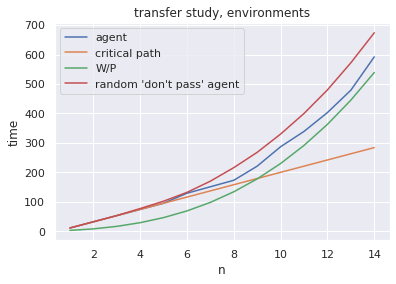

In [36]:
plt.title('transfer study, environments')
plt.plot(ns, times, label='agent')
plt.plot(ns, critical_path, label='critical path')
plt.plot(ns, total_work_normalized, label='W/P')
plt.plot(ns, dont_pass, label="random 'don't pass' agent")
plt.xlabel('n')
plt.ylabel('time')
plt.legend()
plt.savefig('/home/nathan/Documents/transfer_env_8')

In [2]:
torch.multinomial(torch.tensor([1, 0]))

NameError: name 'torch' is not defined